# Explore here

In [13]:
# Your code here
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

data_uniques = data.drop_duplicates()
print(data_uniques.shape)
print(data.shape)

(48895, 16)
(48895, 16)


No hay duplicados

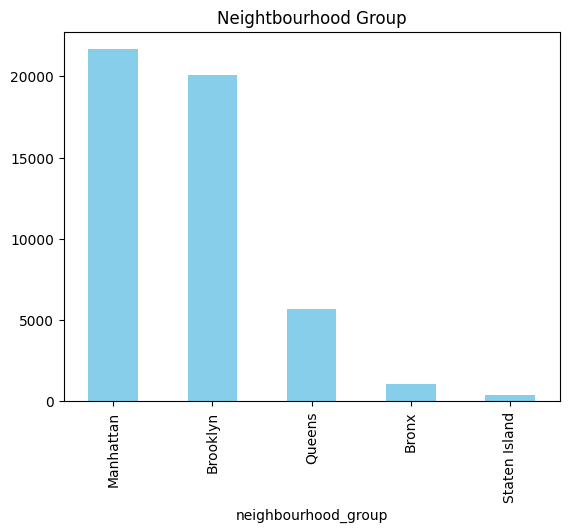

In [14]:
import matplotlib.pyplot as plt
count_neigh = data["neighbourhood_group"].value_counts()
count_neigh.plot(kind='bar', color='skyblue')
plt.title("Neightbourhood Group")
plt.show()

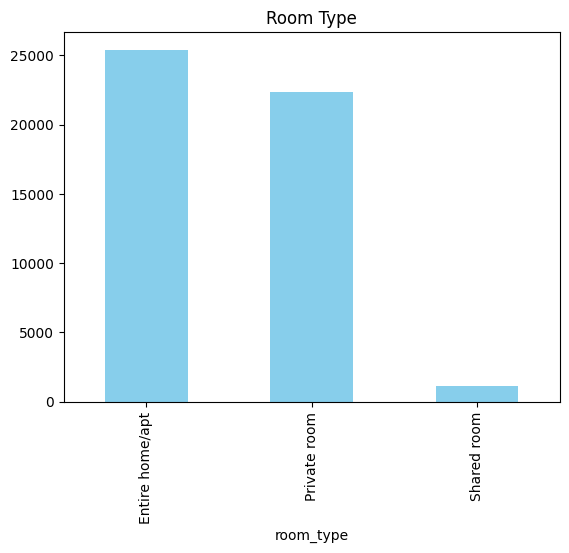

In [15]:
count_room = data["room_type"].value_counts()
count_room.plot(kind='bar', color='skyblue')
plt.title("Room Type")
plt.show()

Procesar valores atípicos:

In [16]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
columns = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]
new_data = data
for i in columns:
    q1=new_data[i].quantile(0.25)
    q3=new_data[i].quantile(0.75)
    iqr = q3-q1
    low_lim = q1 - 1.5*iqr
    hi_lim = q3 + 1.5*iqr

    rem = new_data[(new_data[i]>=hi_lim) | (new_data[i]< low_lim)]
    print(f"\nOutliers en '{i}': {len(rem)} encontrados.{hi_lim} {low_lim}")
    new_data = new_data.drop(index=rem.index)
new_data.describe()


Outliers en 'price': 2977 encontrados.334.0 -90.0

Outliers en 'minimum_nights': 6211 encontrados.11.0 -5.0

Outliers en 'number_of_reviews': 4604 encontrados.71.0 -41.0

Outliers en 'reviews_per_month': 1834 encontrados.3.8449999999999998 -2.035

Outliers en 'calculated_host_listings_count': 2881 encontrados.3.5 -0.5


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.038800e+04,3.038800e+04,30388.000000,30388.000000,30388.000000,30388.000000,30388.000000,24132.000000,30388.000000,30388.000000
mean,1.885519e+07,6.080018e+07,40.728192,-73.951735,121.187706,2.878900,11.054989,0.838769,1.268560,73.228018
std,1.054874e+07,7.359055e+07,0.055897,0.044158,67.287117,1.935736,15.605826,0.915062,0.562928,114.201488
min,2.595000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.679011e+06,7.505504e+06,40.689267,-73.981030,69.000000,1.000000,1.000000,0.140000,1.000000,0.000000
50%,1.945605e+07,2.712674e+07,40.720300,-73.954300,100.000000,2.000000,4.000000,0.460000,1.000000,1.000000
75%,2.805267e+07,8.661073e+07,40.763660,-73.936330,160.000000,4.000000,15.000000,1.220000,1.000000,101.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,333.000000,10.000000,70.000000,3.840000,3.000000,365.000000


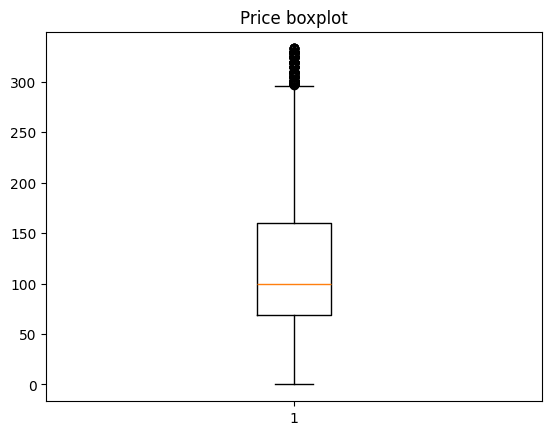

121.18770567329209 0    150
Name: price, dtype: int64


In [18]:
plt.boxplot(x=new_data['price'])
plt.title('Price boxplot')
plt.show()
print(str(new_data['price'].mean())+" "+str(new_data['price'].mode()))

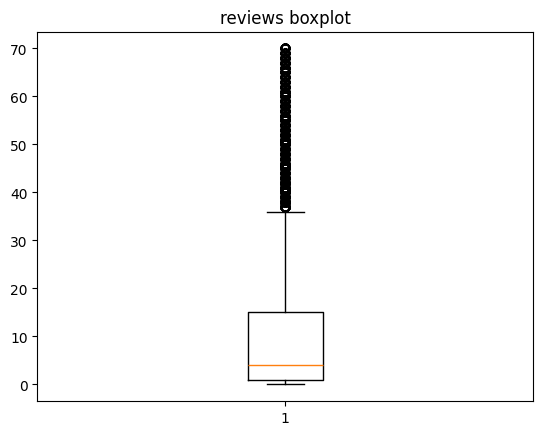

11.05498881137291 0    0
Name: number_of_reviews, dtype: int64


In [19]:
plt.boxplot(x=new_data['number_of_reviews'])
plt.title('reviews boxplot')
plt.show()
print(str(new_data['number_of_reviews'].mean())+" "+str(new_data['number_of_reviews'].mode()))

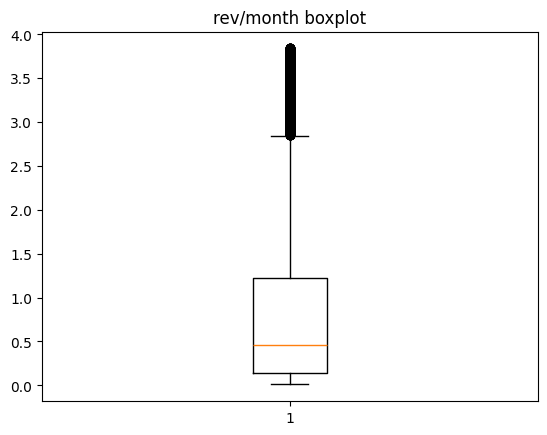

0.8387692690203878 0    0.02
Name: reviews_per_month, dtype: float64


In [20]:
plt.boxplot(x=new_data['reviews_per_month'].dropna())
plt.title('rev/month boxplot')
plt.show()
print(str(new_data['reviews_per_month'].mean())+" "+str(new_data['reviews_per_month'].mode()))

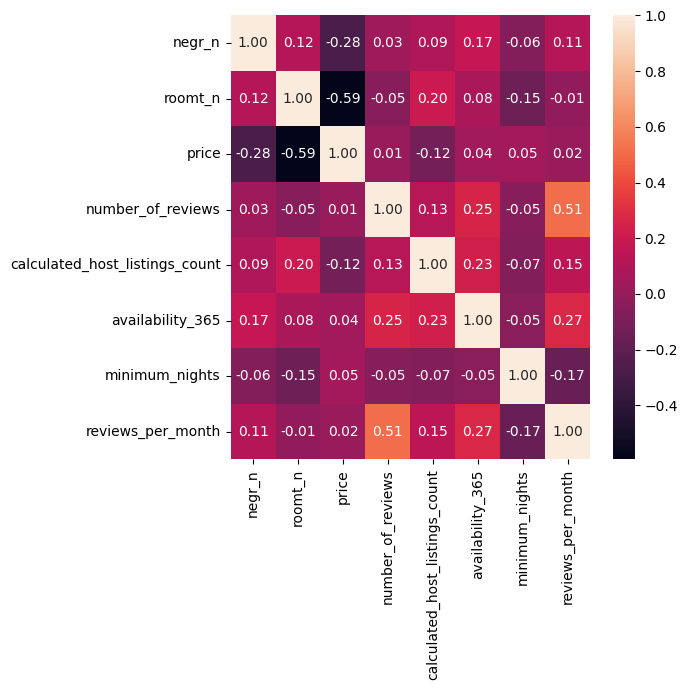

In [21]:
import seaborn as sns
fig, axis = plt.subplots(figsize = (7,7))
new_data['negr_n']=pd.factorize(new_data["neighbourhood_group"])[0]
new_data['roomt_n']=pd.factorize(new_data["room_type"])[0]
sns.heatmap(new_data[["negr_n", "roomt_n","price","number_of_reviews","calculated_host_listings_count","availability_365","minimum_nights","reviews_per_month"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

<Axes: xlabel='neighbourhood_group', ylabel='price'>

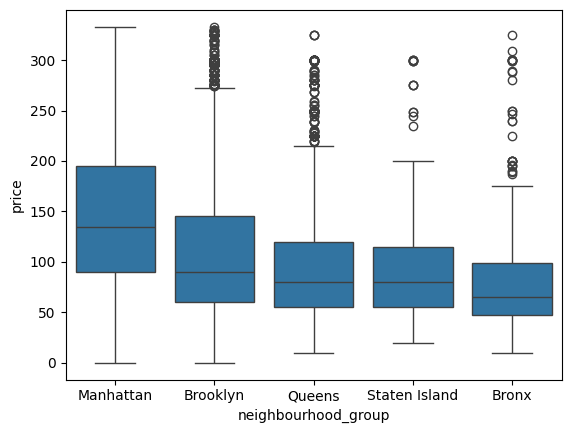

In [22]:
sns.boxplot(x='neighbourhood_group', y='price', data=new_data)


<Axes: xlabel='room_type', ylabel='price'>

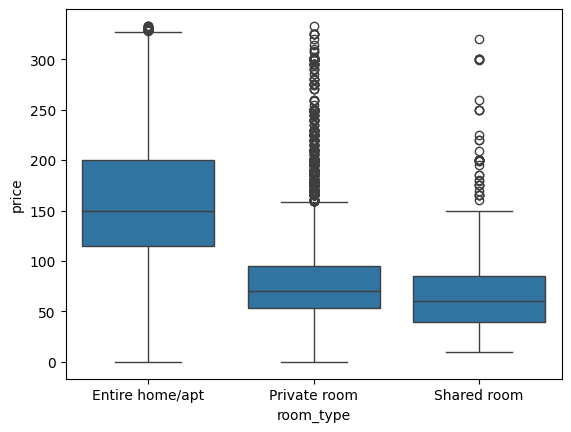

In [23]:
sns.boxplot(x='room_type', y='price', data=new_data)

<Axes: >

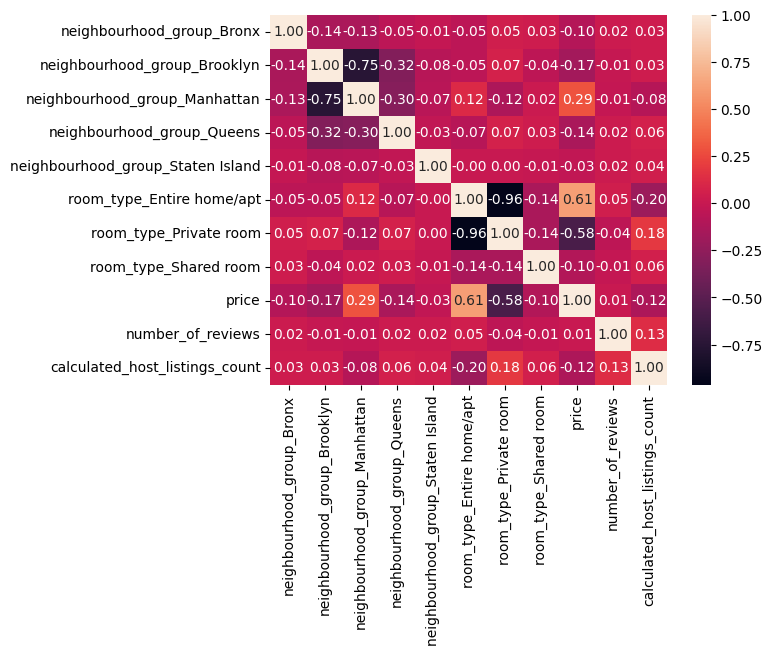

In [24]:
encoded_data = pd.get_dummies(new_data[["neighbourhood_group", "room_type"]])
numeric_data = pd.concat([encoded_data, new_data[["price","number_of_reviews","calculated_host_listings_count"]]], axis=1)
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")